# Proyecto 3 con KNN 

In [1]:
import pandas as pd
df1 = pd.read_csv("data.csv")
df1.head(2)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
df2 = df1.dropna()

In [3]:
df2 = df2.drop(df1.columns[[1,2,3,5,6,7]], axis='columns')
df2 = df2.rename(columns={'0':'price', '4':'time'})
df2.head(3)

,Timestamp,Close
0,1325317920,4.39
478,1325346600,4.39
547,1325350740,4.57


In [4]:
from datetime import datetime
listaDate = []
for date in df2['Timestamp']:
    listaDate.append(datetime.fromtimestamp(date))
df2.index = listaDate

In [6]:
df2.index.name="time"

In [8]:
df3 = df2[::96]
df3

,Timestamp,Close
time,,
2011-12-31 08:52:00,1325317920,4.39
2012-01-09 20:42:00,1326138120,6.35
2012-01-13 14:03:00,1326459780,6.70
2012-01-18 09:31:00,1326875460,6.50
2012-01-25 19:24:00,1327515840,6.09
...,...,...
2021-03-30 18:54:00,1617123240,58687.25
2021-03-30 20:30:00,1617129000,58952.12
2021-03-30 22:06:00,1617134760,58847.32


In [14]:
df4 = df3[::10]
df4

,Timestamp,Close
time,,
2011-12-31 08:52:00,1325317920,4.39
2012-02-23 10:48:00,1329990480,4.76
2012-04-12 17:48:00,1334245680,4.85
2012-05-15 21:54:00,1337111640,4.95
2012-06-12 21:21:00,1339528860,5.66
...,...,...
2021-03-28 04:15:00,1616897700,56033.03
2021-03-28 20:22:00,1616955720,55667.20
2021-03-29 12:27:00,1617013620,58087.46


In [37]:
df4.to_csv('reducido_2.csv', header=False, index=False)
#df5 = df4.filter(like = ('2021-01' and '2021-02'), axis=0)
#df5.to_csv("ene_feb_2021",index=True)

In [15]:
df5 = df4.drop(df2.columns[[0]], axis='columns')
df5

,Close
time,
2011-12-31 08:52:00,4.39
2012-02-23 10:48:00,4.76
2012-04-12 17:48:00,4.85
2012-05-15 21:54:00,4.95
2012-06-12 21:21:00,5.66
...,...
2021-03-28 04:15:00,56033.03
2021-03-28 20:22:00,55667.20
2021-03-29 12:27:00,58087.46


Creamos índice con las fechas

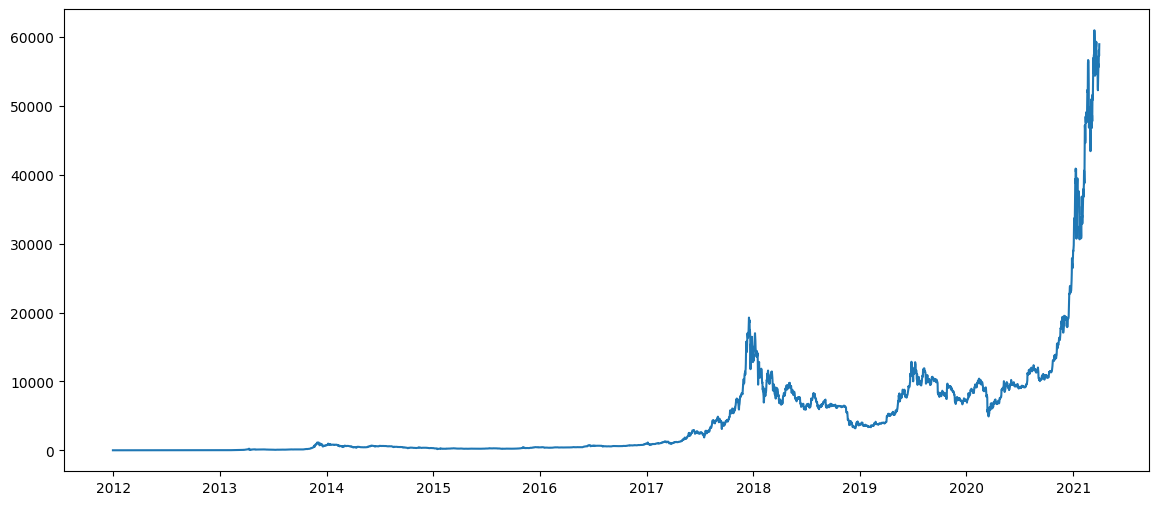

In [16]:
import matplotlib.pyplot as plt

# Forzar gráficos anchos en el notebook de Jupyter
plt.rcParams["figure.figsize"] = (14, 6) # (w, h)

plt.plot(df5)

***

#### En un dataset de valoraciones de Bitcoin, obtener 5 columnas con el delta de los últimos 1, 2, 3, 4 y 5 días.

In [17]:
# Crear 5 columnas con el delta de los últimos 1, 2, 3, 4 y 5 días
for i in range(1, 6):
    df5[f'delta_{i}d'] = df5['Close'].diff(periods=i)
df5

,Close,delta_1d,delta_2d,delta_3d,delta_4d,delta_5d
time,,,,,,
2011-12-31 08:52:00,4.39,NaN,NaN,NaN,NaN,NaN
2012-02-23 10:48:00,4.76,0.37,NaN,NaN,NaN,NaN
2012-04-12 17:48:00,4.85,0.09,0.46,NaN,NaN,NaN
2012-05-15 21:54:00,4.95,0.10,0.19,0.56,NaN,NaN
2012-06-12 21:21:00,5.66,0.71,0.81,0.90,1.27,NaN
...,...,...,...,...,...,...
2021-03-28 04:15:00,56033.03,1045.54,2176.54,3760.01,3142.31,-190.74
2021-03-28 20:22:00,55667.20,-365.83,679.71,1810.71,3394.18,2776.48
2021-03-29 12:27:00,58087.46,2420.26,2054.43,3099.97,4230.97,5814.44


<AxesSubplot: xlabel='time'>

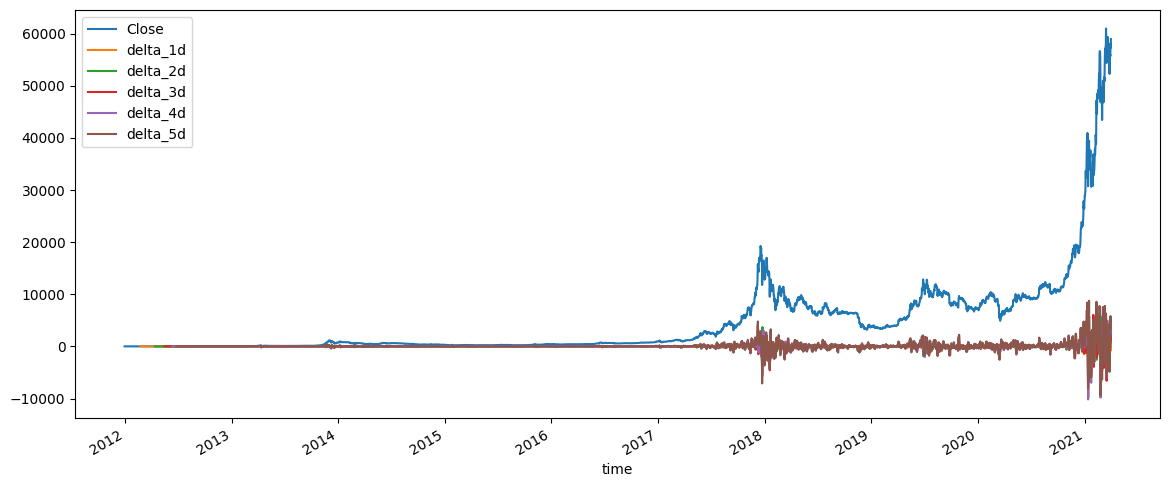

In [18]:
df5.plot()

La valoración tan alta de BTC eclipsa los deltas. Graficamos sólo los deltas:

<AxesSubplot: xlabel='time'>

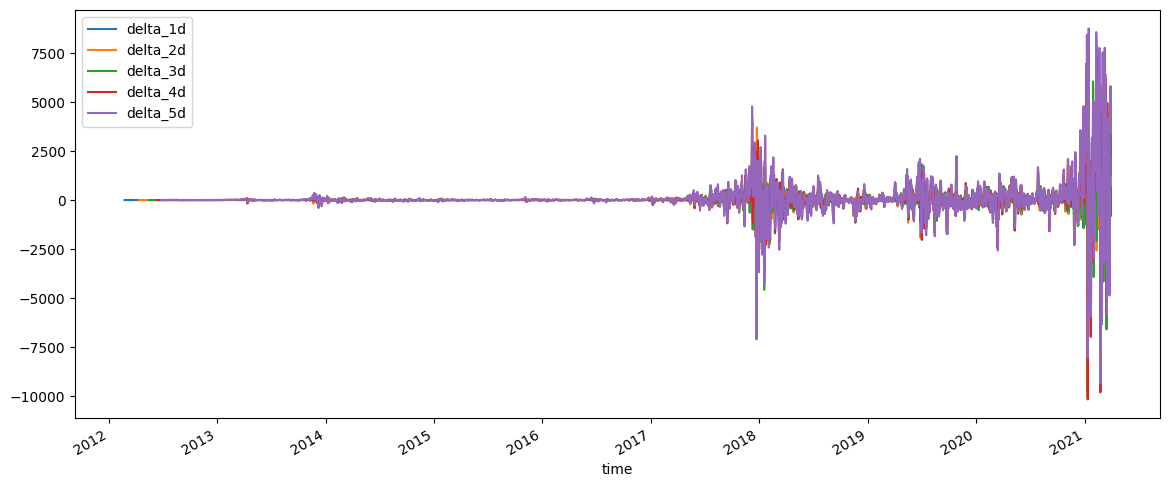

In [19]:
df5[['delta_1d', 'delta_2d', 'delta_3d', 'delta_4d', 'delta_5d']].plot()

Graficamos los deltas de forma comparativa con espaciados constantes

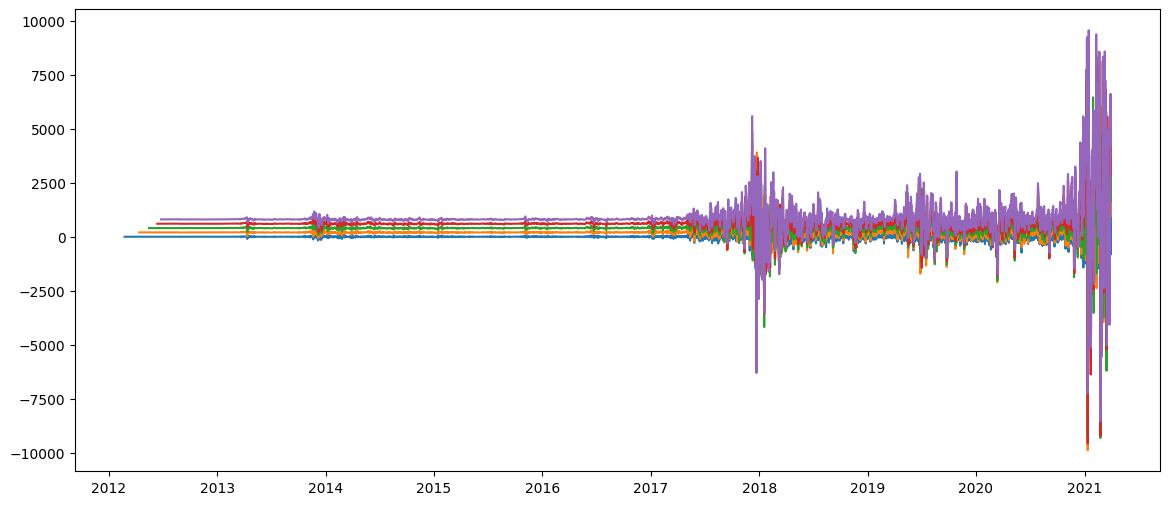

In [20]:
plt.plot(df5[['delta_1d']])
plt.plot(df5[['delta_2d']] + 200)
plt.plot(df5[['delta_3d']] + 400)
plt.plot(df5[['delta_4d']] + 600)
plt.plot(df5[['delta_5d']] + 800)
plt.show()

Descubriendo zonas de mayor volatilidad, mediante moving average

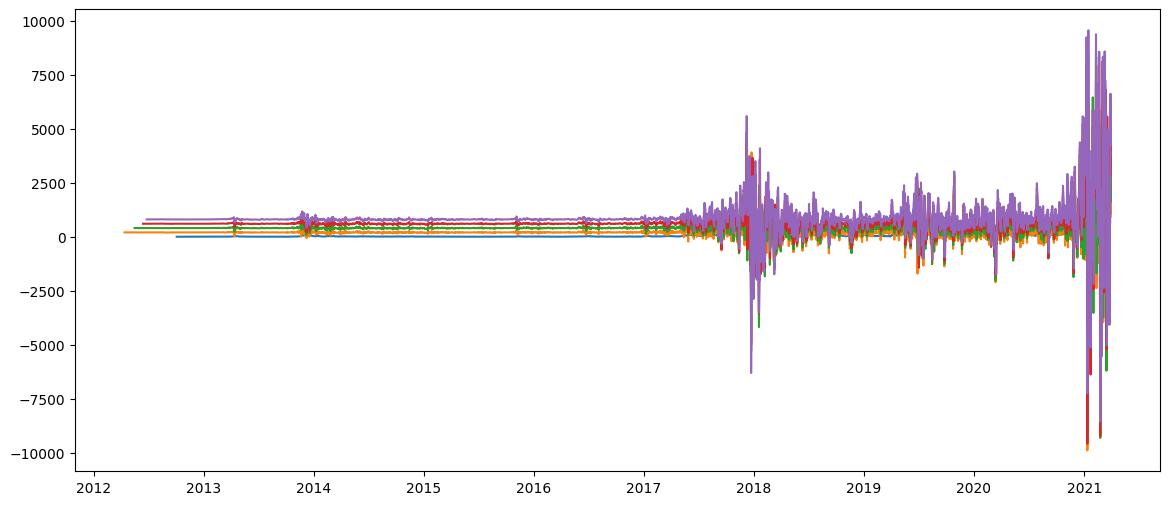

In [21]:
plt.plot(abs(df5[['delta_1d']]).rolling(window=16).mean())
plt.plot(df5[['delta_2d']] + 200)
plt.plot(df5[['delta_3d']] + 400)
plt.plot(df5[['delta_4d']] + 600)
plt.plot(df5[['delta_5d']] + 800)
plt.show()

Análisis de correlación de los deltas

In [22]:
df5[['delta_1d', 'delta_2d', 'delta_3d', 'delta_4d', 'delta_5d']].corr()

,delta_1d,delta_2d,delta_3d,delta_4d,delta_5d
delta_1d,1.000000,0.699417,0.535407,0.478258,0.442223
delta_2d,0.699417,1.000000,0.797186,0.669202,0.614505
delta_3d,0.535407,0.797186,1.000000,0.847130,0.743182
delta_4d,0.478258,0.669202,0.847130,1.000000,0.878186
delta_5d,0.442223,0.614505,0.743182,0.878186,1.000000


<AxesSubplot: >

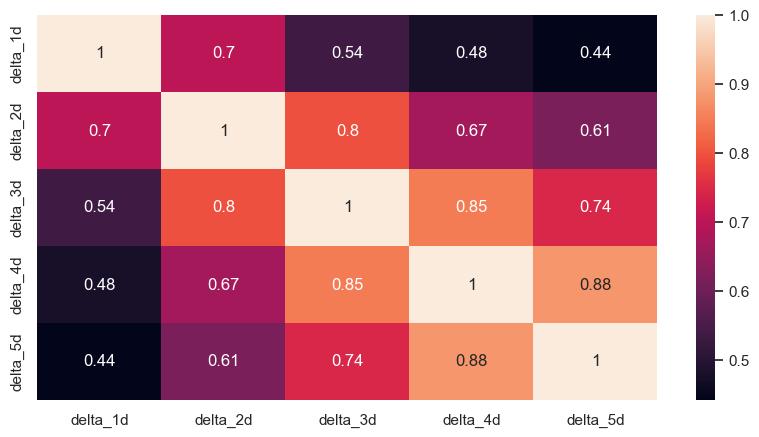

In [23]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10,5)})
sns.heatmap(df5[['delta_1d', 'delta_2d', 'delta_3d', 'delta_4d', 'delta_5d']].corr(), annot=True)

***

#### Buscar en la gráfica 3 fechas de clara tendencia alcista y 3 de bajista.

Alcista: 

In [24]:
# Buscar las 3 fechas con el mayor delta_5d, ordenando por esta columna
btc_sorted = df5.sort_values(by='delta_5d', ascending=False)
btc_sorted[:3]

,Close,delta_1d,delta_2d,delta_3d,delta_4d,delta_5d
time,,,,,,
2021-01-15 01:16:00,39476.40,840.85,4884.76,5662.57,3400.03,8751.40
2021-02-09 09:49:00,47175.51,3815.02,8395.69,7803.09,6580.59,8567.03
2021-01-09 01:16:00,40895.43,2127.48,1511.42,4292.93,6195.99,8426.57


In [25]:
# Buscar las 3 fechas con el menor delta_5d
btc_sorted[-8:]

,Close,delta_1d,delta_2d,delta_3d,delta_4d,delta_5d
time,,,,,,
2021-01-11 17:16:00,30725.00,-7009.10,-10078.34,-9702.15,-10170.43,-8042.95
2021-02-24 01:58:00,48439.11,1593.71,-4740.85,-7894.55,-8112.14,-8218.67
2021-02-23 09:58:00,46845.40,-6334.56,-9488.26,-9705.85,-9812.38,-9347.07
2011-12-31 08:52:00,4.39,NaN,NaN,NaN,NaN,NaN
2012-02-23 10:48:00,4.76,0.37,NaN,NaN,NaN,NaN
2012-04-12 17:48:00,4.85,0.09,0.46,NaN,NaN,NaN
2012-05-15 21:54:00,4.95,0.10,0.19,0.56,NaN,NaN
2012-06-12 21:21:00,5.66,0.71,0.81,0.90,1.27,NaN


***

#### Crear un dataset de entrenamiento con las 6 fechas encontradas y las 5 columnas de deltas.

In [26]:
# Quito los NaN's
btc_sorted = btc_sorted.dropna()
btc_sorted

,Close,delta_1d,delta_2d,delta_3d,delta_4d,delta_5d
time,,,,,,
2021-01-15 01:16:00,39476.40,840.85,4884.76,5662.57,3400.03,8751.40
2021-02-09 09:49:00,47175.51,3815.02,8395.69,7803.09,6580.59,8567.03
2021-01-09 01:16:00,40895.43,2127.48,1511.42,4292.93,6195.99,8426.57
2021-03-10 02:25:00,55542.57,1542.57,4652.86,3900.27,4683.21,7770.78
2021-02-20 01:57:00,56192.47,3992.47,4192.48,3874.95,5265.32,7760.99
...,...,...,...,...,...,...
2017-12-22 15:11:00,11778.00,-3890.23,-5081.98,-5701.88,-5602.01,-7101.47
2021-02-24 17:58:00,49404.61,965.50,2559.21,-3775.35,-6929.05,-7146.64
2021-01-11 17:16:00,30725.00,-7009.10,-10078.34,-9702.15,-10170.43,-8042.95


In [27]:
# Dejo sólo las 3 primeras filas y las 3 últimas
# Obtener las 3 primeras filas
btc_sorted_head = btc_sorted.head(3)

# Obtener las 3 últimas filas
btc_sorted_tail = btc_sorted.tail(3)

# Concatenar las primeras y últimas filas
dfTraining = pd.concat([btc_sorted_head, btc_sorted_tail])

dfTraining

,Close,delta_1d,delta_2d,delta_3d,delta_4d,delta_5d
time,,,,,,
2021-01-15 01:16:00,39476.40,840.85,4884.76,5662.57,3400.03,8751.40
2021-02-09 09:49:00,47175.51,3815.02,8395.69,7803.09,6580.59,8567.03
2021-01-09 01:16:00,40895.43,2127.48,1511.42,4292.93,6195.99,8426.57
2021-01-11 17:16:00,30725.00,-7009.10,-10078.34,-9702.15,-10170.43,-8042.95
2021-02-24 01:58:00,48439.11,1593.71,-4740.85,-7894.55,-8112.14,-8218.67
2021-02-23 09:58:00,46845.40,-6334.56,-9488.26,-9705.85,-9812.38,-9347.07


***

#### Entrenar KNN con este dataset de entrenamiento

In [28]:
import numpy as np

# La etiqueta 1 significará alcista y -1 bajista
labels = np.array(['1','1','1','-1','-1','-1'])
labels

array(['1', '1', '1', '-1', '-1', '-1'], dtype='<U2')

In [29]:
train = np.array(dfTraining[['delta_1d', 'delta_2d', 'delta_3d', 'delta_4d', 'delta_5d']])
# train = train.reshape(-1, 1)
train

array([[   840.85,   4884.76,   5662.57,   3400.03,   8751.4 ],
       [  3815.02,   8395.69,   7803.09,   6580.59,   8567.03],
       [  2127.48,   1511.42,   4292.93,   6195.99,   8426.57],
       [ -7009.1 , -10078.34,  -9702.15, -10170.43,  -8042.95],
       [  1593.71,  -4740.85,  -7894.55,  -8112.14,  -8218.67],
       [ -6334.56,  -9488.26,  -9705.85,  -9812.38,  -9347.07]])

***

#### Aplica predicción de KNN para determinar la tendencia alcista/bajista en una fecha dada sobre el dataset completo.

In [30]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# inicializar modelo
knn = KNeighborsClassifier(n_neighbors=3)

# entrenar modelo
knn.fit(train, labels)

# evaluar modelo
score = knn.score(train, labels)
print("Precisión del modelo:", score)

Precisión del modelo: 1.0


In [31]:
# Datos de test, todo el dataset
dfTesting = btc_sorted
test = np.array(dfTesting[['delta_1d', 'delta_2d', 'delta_3d', 'delta_4d', 'delta_5d']])
test

array([[   840.85,   4884.76,   5662.57,   3400.03,   8751.4 ],
       [  3815.02,   8395.69,   7803.09,   6580.59,   8567.03],
       [  2127.48,   1511.42,   4292.93,   6195.99,   8426.57],
       ...,
       [ -7009.1 , -10078.34,  -9702.15, -10170.43,  -8042.95],
       [  1593.71,  -4740.85,  -7894.55,  -8112.14,  -8218.67],
       [ -6334.56,  -9488.26,  -9705.85,  -9812.38,  -9347.07]])

In [32]:
predLabel = knn.predict(test)
predLabel

array(['1', '1', '1', ..., '-1', '-1', '-1'], dtype='<U2')

***

#### Dibuja los valores alcistas de Bitcoin en color azul y los bajistas en color rojo

In [33]:
# Se agrega la predicción como columna nueva en el dataframe
btc_sorted["trend"] = predLabel
btc_sorted

,Close,delta_1d,delta_2d,delta_3d,delta_4d,delta_5d,trend
time,,,,,,,
2021-01-15 01:16:00,39476.40,840.85,4884.76,5662.57,3400.03,8751.40,1
2021-02-09 09:49:00,47175.51,3815.02,8395.69,7803.09,6580.59,8567.03,1
2021-01-09 01:16:00,40895.43,2127.48,1511.42,4292.93,6195.99,8426.57,1
2021-03-10 02:25:00,55542.57,1542.57,4652.86,3900.27,4683.21,7770.78,1
2021-02-20 01:57:00,56192.47,3992.47,4192.48,3874.95,5265.32,7760.99,1
...,...,...,...,...,...,...,...
2017-12-22 15:11:00,11778.00,-3890.23,-5081.98,-5701.88,-5602.01,-7101.47,-1
2021-02-24 17:58:00,49404.61,965.50,2559.21,-3775.35,-6929.05,-7146.64,-1
2021-01-11 17:16:00,30725.00,-7009.10,-10078.34,-9702.15,-10170.43,-8042.95,-1


In [36]:
# Dibujar gráfico de dispersión con color que indica la tendencia predicha por KNN

plt.plot(df5["Close"], color="#999", zorder=1) # zorder sirve para que la línea (plot) quede debajo de los puntos (scatter)

# Para hacer que el color de cada punto se base en la columna trend
# hay que asignar un color rojo o azul según el valor de la columna trend
# en cada fila.

# Plot the data
for time, row in btc_sorted.iterrows():
    # print(time, row)
    if row['trend'] == "1":
        plt.scatter(time, row['Close'], color='blue', s=5, zorder=2)
    else:
        plt.scatter(time, row['Close'], color='red', s=5, zorder=2)

plt.show()

KeyboardInterrupt: 